# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("c:/users/chand/desktop/chandra.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price

response_data_BTC = requests.get(btc_url).json()
btc_price = response_data_BTC["data"]['1']["quotes"]["USD"]["price"]

# Fetch current ETH price
response_data_ETH = requests.get(eth_url).json()
eth_price=response_data_ETH["data"]['1027']["quotes"]["USD"]["price"]


# Compute current value of my crpto
my_btc=1.2
my_eth=5.3

my_btc_value=btc_price*my_btc
my_eth_value=eth_price*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $61035.60
The current value of your 5.3 ETH is $12146.43


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares

shares_data={
        "shares":[200,50]
}
tickers = ["AGG", "SPY"]
df_shares=pd.DataFrame(shares_data,index=tickers)
df_shares

,shares
AGG,200
SPY,50


In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")
#print(alpaca_api_key)
#print(alpaca_secret_key)

# Create the Alpaca API object
alpaca_obj= tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2",
)


In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
from datetime import date
start_date=pd.Timestamp("2021-04-22",tz="America/New_York").isoformat()
end_date=pd.Timestamp("2021-04-22",tz="America/New_York").isoformat()
#end_date=pd.Timestamp(date.today(),tz="america/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_tickers=alpaca_obj.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1,
).df
    
# Preview DataFrame
df_tickers


AGG                                     SPY  \
                             open   high     low   close   volume    open   
time                                                                        
2021-04-22 00:00:00-04:00  114.74  114.8  114.59  114.77  3518947  415.88   

                                                            
                             high     low  close    volume  
time                                                        
2021-04-22 00:00:00-04:00  416.78  411.13  412.3  90086341

In [9]:
# Pick AGG and SPY close prices
agg_close_price=float(df_tickers["AGG"]["close"])
spy_close_price=float(df_tickers["SPY"]["close"])
# YOUR CODE HERE!

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.77
Current SPY closing price: $412.3


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy=df_shares.loc["SPY"]["shares"] #Total shares held
my_agg=df_shares.loc["AGG"]["shares"] #Total bonds units held

my_spy_value=my_spy*spy_close_price
my_agg_value=my_agg*agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
#The current value of your 50 SPY shares is $16727.50
#The current value of your 200 AGG shares is $23889.00

The current value of your 50 SPY shares is $20615.00
The current value of your 200 AGG shares is $22954.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income=12000


total_stock_value=my_spy_value+my_agg_value
total_crypto_value=my_btc_value+my_eth_value

#print(total_stock_value)
#print(total_crypto_value)
# Create savings DataFrame

portfolio=["Crypto","Shares"]
port_folio_value={
 
    "Amount":[total_crypto_value,total_stock_value]
}
df_savings= pd.DataFrame(port_folio_value,index=portfolio)

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,73182.034
Shares,43569.000


<AxesSubplot:title={'center':'Portfolio’s Contribution'}, ylabel='Amount'>

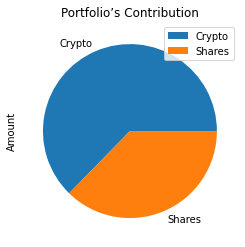

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount",title="Portfolio’s Contribution")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_saving=total_stock_value+total_crypto_value
#print(total_saving)

# Validate saving health
client_name="Bill Gates"
goal_difference=total_saving-emergency_fund
if goal_difference>0:
    print(f"Congratulation {client_name}, you have enough money in this emergency fund.")
elif goal_difference == 0:
    print(f"Congratulation  {client_name}, you have reached you financial goal.") 
else: 
    print(f"{client_name}, you have done a good job, but still you are short of {goal_diffrence} to reach your goal.")



Congratulation Bill Gates, you have enough money in this emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-23', tz='America/New_York').isoformat()

In [41]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data=alpaca_obj.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
    
# Preview DataFrame

# YOUR CODE HERE!
df_stock_data= df_stock_data.dropna()
df_stock_data.head()


AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2017-05-04 00:00:00-04:00  108.55  108.70  108.55  108.665  1789624  238.83   
2017-05-05 00:00:00-04:00  108.72  108.74  108.57  108.720  1287794  239.18   
2017-05-08 00:00:00-04:00  108.63  108.67  108.49  108.495  1579134  239.76   
2017-05-09 00:00:00-04:00  108.43  108.51  108.40  108.495  2395343  239.96   
2017-05-10 00:00:00-04:00  108.60  108.66  108.44  108.520  1427511  239.38   

                                                               
                               high     low   close    volume  
time                                                           
2017-05-04 00:00:00-04:00  238.9225  237.78  238.75  46170233  
2017-05-05 00:00:00-04:00  239.7200  238.68  239.72  43733544  
2017-05-08 00:00:00-04:00  239.9200  239.17  239.67  32087919  
2017-05-09 00:00:00-04:00  240.1900  239.04  239.46  39723891  
2017-05-10 00:00:00-04:00  239.8700  239.15  239.85  34222778

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns


MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [17]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()
# YOUR CODE HERE!

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2017-05-04 00:00:00-04:00  108.55  108.70  108.55  108.665  1789624   
2017-05-05 00:00:00-04:00  108.72  108.74  108.57  108.720  1287794   
2017-05-08 00:00:00-04:00  108.63  108.67  108.49  108.495  1579134   
2017-05-09 00:00:00-04:00  108.43  108.51  108.40  108.495  2395343   
2017-05-10 00:00:00-04:00  108.60  108.66  108.44  108.520  1427511   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-05-04 00:00:00-04:00          NaN  238.83  238.9225  237.78  238.75   
2017-05-05 00:00:00-04:00     0.000506  239.18  239.7200  238.68  239.72   
2017-05-08 00:00:00-04:00    -0.002070  239.76  239.9200  239.17  239.67   
2017-05-09 00:00:00-04:00     0.000000  239.96  240.1900  239.04  239.46   
2017-05-10 00:00:00-04:00     0.000230  239.38  239.8700  239.15  239.85   

                                                  
                             volume daily_return  
time                                              
2017-05-04 00:00:00-04:00  46170233          NaN  
2017-05-05 00:00:00-04:00  43733544     0.004063  
2017-05-08 00:00:00-04:00  32087919    -0.000209  
2017-05-09 00:00:00-04:00  39723891    -0.000876  
2017-05-10 00:00:00-04:00  34222778     0.001629

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988019,0.985656,0.993082,1.007687,0.995168,1.010132,1.000174,0.993990,1.015616,0.995555,...,0.997523,1.008928,0.998380,0.996984,1.000062,1.014439,0.995762,0.987849,0.999469,1.003386
2,0.997748,0.974432,0.988810,1.009158,0.991535,1.014618,0.982239,0.988863,1.000821,1.001662,...,0.985749,1.008387,0.996810,1.002608,0.994991,1.014694,0.994105,0.998288,0.995314,1.000680
3,0.995220,0.976268,0.986088,1.013863,0.999684,1.018577,0.989173,0.976686,1.014208,1.001947,...,0.988889,1.008772,0.993578,0.994439,1.002521,1.022223,0.999876,0.982336,1.000676,1.019560
4,0.990037,0.982407,0.979687,1.014776,1.003368,1.017501,0.988377,0.985138,1.007388,0.994996,...,0.987321,1.014679,0.988468,1.005848,1.005462,1.018526,1.005482,0.982501,1.002897,1.012295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.269324,10.871980,14.891842,21.862948,24.288747,21.042080,54.723734,18.306848,28.043763,7.859569,...,14.103939,17.780191,21.482973,76.471958,4.129031,7.493752,9.961033,4.711806,6.335713,21.494300
7557,10.382084,10.693613,14.890387,21.778465,24.350679,21.322814,54.812513,18.536041,28.083254,7.853060,...,14.228269,17.819974,21.736447,77.339521,4.171550,7.445435,10.102418,4.719370,6.338576,21.389828
7558,10.332300,10.722637,14.954371,22.114691,24.179616,21.384162,54.721965,18.561326,27.858444,7.957163,...,14.241814,17.988787,21.902729,77.129579,4.152651,7.527122,9.967126,4.685168,6.271727,21.100086
7559,10.369866,10.629600,14.983723,22.281390,24.272442,21.295772,55.081274,18.619950,27.381810,8.042836,...,14.299744,17.995323,21.950824,77.661082,4.176811,7.513983,9.973403,4.728808,6.242806,20.629886


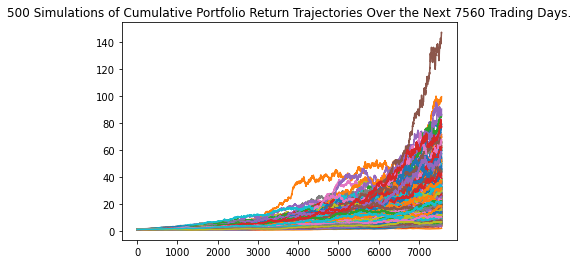

In [19]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()


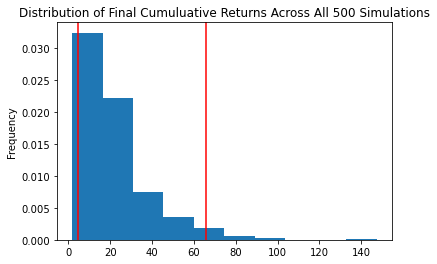

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()



### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_table = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics

print(summary_table)



count           500.000000
mean             22.312580
std              16.931591
min               1.808916
25%              10.738234
50%              17.563287
75%              27.606671
max             147.261473
95% CI Lower      4.775572
95% CI Upper     65.732292
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower=round(summary_table[8]*initial_investment)
ci_upper=round(summary_table[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95511 and $1314646


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower=round(summary_table[8]*initial_investment)
ci_upper=round(summary_table[9]*initial_investment)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $143267 and $1971969


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000363,1.003277,0.997933,1.001084,1.002581,1.003657,1.005088,1.003002,1.000187,1.007206,...,1.009116,1.010838,0.998221,0.998412,0.980750,0.997909,1.014048,0.987794,1.024112,1.011061
2,0.990719,1.001730,0.998795,1.001206,1.002131,1.001355,1.001895,1.000236,0.997066,1.015761,...,1.012571,1.009651,1.000784,0.996199,0.971876,1.000276,1.009851,0.978895,1.037632,1.007728
3,0.992575,0.999012,0.996714,1.001977,1.012876,1.007300,1.011892,1.001795,0.996746,1.026956,...,1.015524,1.010565,1.001258,1.005831,0.975400,1.011297,1.004347,0.986896,1.057543,1.018593
4,0.996912,1.004656,0.992617,0.995924,1.013742,1.006482,1.006905,0.995471,1.003501,1.027821,...,1.020074,0.999085,1.008038,1.004486,0.977064,1.023852,1.005502,0.989163,1.062913,1.007248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.686306,1.588844,2.141421,1.462844,1.544166,1.892602,1.609514,2.459500,1.105640,1.876246,...,1.621167,1.635087,1.865479,1.160458,1.797703,1.131108,1.627667,1.207865,1.335772,1.511086
1257,1.678142,1.623908,2.120521,1.458881,1.535097,1.903727,1.613430,2.464935,1.102669,1.875948,...,1.631913,1.635710,1.858214,1.173575,1.803293,1.129456,1.638548,1.208746,1.342079,1.539709
1258,1.695958,1.630460,2.110936,1.455265,1.539719,1.888423,1.596309,2.457443,1.096977,1.872033,...,1.633586,1.635345,1.849560,1.148588,1.809435,1.142492,1.627251,1.187054,1.328680,1.570689
1259,1.695962,1.628170,2.111060,1.447764,1.535722,1.889332,1.599791,2.452380,1.117143,1.866115,...,1.649889,1.632054,1.842203,1.149783,1.826828,1.160668,1.605123,1.179032,1.326374,1.559827


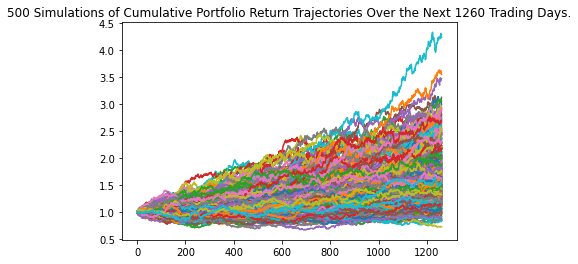

In [26]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

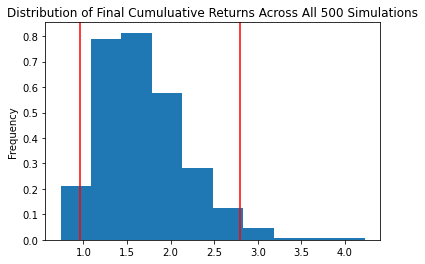

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_table=MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(summary_table)

count           500.000000
mean              1.676774
std               0.485192
min               0.737352
25%               1.333231
50%               1.599354
75%               1.950872
max               4.228264
95% CI Lower      0.961231
95% CI Upper      2.793755
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five=round(summary_table[8]*initial_investment)
ci_upper_five=round(summary_table[9]*initial_investment)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57674 and $167625


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996608,0.994706,0.990190,0.993644,0.992891,1.016173,0.992851,1.004853,0.992871,0.998134,...,0.991381,1.002533,1.008890,0.994690,0.983206,0.997495,1.004496,1.003103,1.006397,1.014572
2,1.002407,0.989256,0.997381,0.990197,0.992712,1.008284,0.995666,1.007219,0.991547,1.008481,...,0.997362,1.007370,1.010622,0.991788,0.999825,0.992786,1.008423,0.997880,1.010890,1.019651
3,1.006777,0.985260,0.994021,1.000176,0.989334,1.019743,0.982054,0.994670,0.986781,1.009959,...,0.982337,1.008679,1.005917,0.997498,0.993404,1.002325,1.003677,1.003501,1.019587,1.031352
4,1.010537,0.976385,0.971249,0.989104,0.979248,1.027212,0.978857,0.995544,0.993978,1.002387,...,0.970676,1.003037,1.002131,0.997221,0.985588,1.001322,0.983364,0.996252,1.027104,1.031305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.439374,1.781051,1.636419,3.260422,1.747060,2.187460,2.128879,2.076560,1.927107,0.876705,...,1.809807,3.265040,2.066653,1.426907,1.514145,2.719884,3.955087,1.789513,1.294702,3.621659
2517,2.426991,1.789794,1.642140,3.277575,1.731370,2.178084,2.144821,2.068969,1.938613,0.878036,...,1.798194,3.274226,2.050077,1.426354,1.516505,2.682245,3.972189,1.776253,1.292612,3.597447
2518,2.431944,1.831148,1.641465,3.276878,1.731514,2.191457,2.159411,2.077309,1.932810,0.878127,...,1.836886,3.237747,2.034513,1.406575,1.526313,2.674121,3.932110,1.799669,1.292324,3.593767
2519,2.428522,1.834644,1.642447,3.265164,1.746586,2.198548,2.193690,2.086406,1.926552,0.884332,...,1.835478,3.203476,2.054463,1.409209,1.514113,2.660042,3.943326,1.785567,1.297969,3.593235


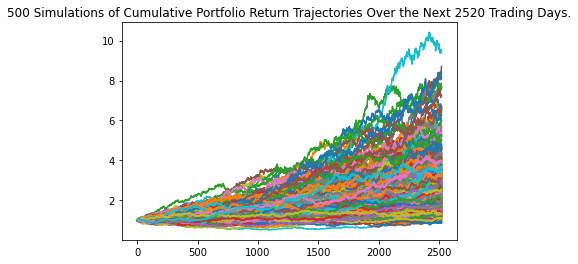

In [32]:
# Plot simulation outcomes
line_plot=MC_ten_year.plot_simulation()

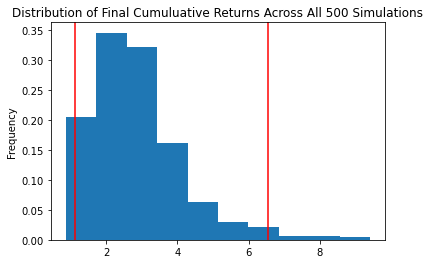

In [33]:
# Plot probability distribution and confidence intervals
dist_plot=MC_ten_year.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_table=MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(summary_table)

count           500.000000
mean              2.843114
std               1.317936
min               0.863316
25%               1.940521
50%               2.637751
75%               3.447784
max               9.419247
95% CI Lower      1.130484
95% CI Upper      6.542832
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten=round(summary_table[8]*initial_investment)
ci_upper_ten=round(summary_table[9]*initial_investment)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $67829 and $392570
